In [92]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory


In [94]:
!kaggle datasets download -d aaronfriasr/amazon-products-dataset

amazon-products-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [95]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir,calculate_results

--2024-04-30 04:01:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-04-30 04:01:56 (36.0 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [96]:
! wget https://raw.githubusercontent.com/jul1998/tensorflow_projects/main/scripts_for_tensorflow.py
from scripts_for_tensorflow import *

--2024-04-30 04:01:56--  https://raw.githubusercontent.com/jul1998/tensorflow_projects/main/scripts_for_tensorflow.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9583 (9.4K) [text/plain]
Saving to: ‘scripts_for_tensorflow.py.1’

scripts_for_tensorf 100%[===================>]   9.36K  --.-KB/s    in 0s      

2024-04-30 04:01:56 (97.6 MB/s) - ‘scripts_for_tensorflow.py.1’ saved [9583/9583]



In [97]:
unzip_data('/content/amazon-products-dataset.zip')

In [98]:
df = pd.read_csv('/content/amazon_products.csv')
df.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400


In [99]:
amazon_cats_df = pd.read_csv('/content/amazon_categories.csv')
amazon_cats_df.head()

,id,category_name
0,1,Beading & Jewelry Making
1,2,Fabric Decorating
2,3,Knitting & Crochet Supplies
3,4,Printmaking Supplies
4,5,Scrapbooking & Stamping Supplies


In [100]:
# prompt: change column name id in amazon_cats_df for category_id

amazon_cats_df.rename(columns={'id': 'category_id'}, inplace=True)


In [101]:
# prompt: combine df with amazon_cats_df by category_id

merged_df = pd.merge(df, amazon_cats_df, on='category_id')
merged_df.head()


,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000,Suitcases
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000,Suitcases
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300,Suitcases
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400,Suitcases
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400,Suitcases


In [102]:
merged_df.shape

(1426337, 12)

In [103]:
# prompt: Check duplicates, nulls, etc

# Check for duplicates
num_duplicates = merged_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Check for null values
null_counts = merged_df.isnull().sum()
print(f"Number of null values per column:\n{null_counts}")

# Check data types
dtypes = merged_df.dtypes
print(f"Data types:\n{dtypes}")

# Get descriptive statistics
merged_df.describe()


Number of duplicate rows: 0
Number of null values per column:
asin                 0
title                1
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
category_id          0
isBestSeller         0
boughtInLastMonth    0
category_name        0
dtype: int64
Data types:
asin                  object
title                 object
imgUrl                object
productURL            object
stars                float64
reviews                int64
price                float64
listPrice            float64
category_id            int64
isBestSeller            bool
boughtInLastMonth      int64
category_name         object
dtype: object


,stars,reviews,price,listPrice,category_id,boughtInLastMonth
count,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06,1.426337e+06
mean,3.999512e+00,1.807508e+02,4.337540e+01,1.244916e+01,1.237409e+02,1.419823e+02
std,1.344292e+00,1.761453e+03,1.302893e+02,4.611198e+01,7.311273e+01,8.362720e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,4.100000e+00,0.000000e+00,1.199000e+01,0.000000e+00,6.500000e+01,0.000000e+00
50%,4.400000e+00,0.000000e+00,1.995000e+01,0.000000e+00,1.200000e+02,0.000000e+00
75%,4.600000e+00,0.000000e+00,3.599000e+01,0.000000e+00,1.760000e+02,5.000000e+01
max,5.000000e+00,3.465630e+05,1.973181e+04,9.999900e+02,2.700000e+02,1.000000e+05


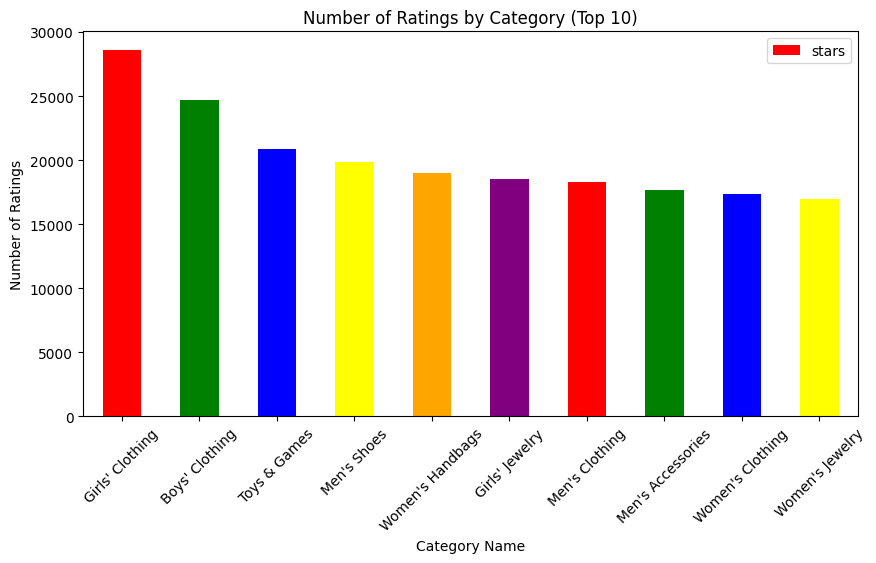

In [104]:
# prompt: check and plot number of starts by category_name. Show it in stacked bars. Top 10

most_rated_categories = (
    merged_df.groupby('category_name')['stars'].count().sort_values(ascending=False).head(10)
)

most_rated_categories_df = pd.DataFrame(most_rated_categories)
most_rated_categories_df.reset_index(inplace=True)

ax = most_rated_categories_df.plot(
    kind="bar",
    x="category_name",
    y="stars",
    title="Number of Ratings by Category (Top 10)",
    figsize=(10, 5),
    color=["red", "green", "blue", "yellow", "orange", "purple"],
)
ax.set_xlabel("Category Name")
ax.set_ylabel("Number of Ratings")
plt.xticks(rotation=45)
plt.show()


In [105]:
# prompt: show mix and max prices

print(f"Minimum price: {merged_df['listPrice'].min()}")
print(f"Maximum price: {merged_df['listPrice'].max()}")


Minimum price: 0.0
Maximum price: 999.99


In [106]:
# prompt: create another df only with 1% of data

df_sample = merged_df.sample(frac=0.001, random_state=42)
df_sample.shape

(1426, 12)

In [107]:
df_sample.to_csv('1_percent_amazon_data.csv')

## Tensorflow model

In [108]:
# Features (removing the target variable and other unnecessary columns)
X = df_sample.drop('boughtInLastMonth', axis=1)

# Target (just the sales data)
y = df_sample['boughtInLastMonth']

In [109]:
df_sample.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name
904813,B084VRKB4Z,Custom Womens Ponytail Cap Chaos Coordinator G...,https://m.media-amazon.com/images/I/61PreKRNVT...,https://www.amazon.com/dp/B084VRKB4Z,4.1,0,24.99,0.00,120,False,0,Women's Accessories
426645,B08K3X4T9B,"smabee Indoor Doormat Front Door Mat 17""x28"", ...",https://m.media-amazon.com/images/I/81IotCN+R6...,https://www.amazon.com/dp/B08K3X4T9B,4.4,0,12.45,0.00,166,False,100,Furniture
395996,B0B6P8MG76,"Dinosaur First Birthday Decorations, 1st Birth...",https://m.media-amazon.com/images/I/719vd+1vQV...,https://www.amazon.com/dp/B0B6P8MG76,5.0,15,9.99,13.97,216,False,50,Kids' Party Supplies
986224,B09WB392QD,"NutraBio Amino 3894, Amino Acid Capsules with ...",https://m.media-amazon.com/images/I/61+qilaMBe...,https://www.amazon.com/dp/B09WB392QD,4.1,0,24.99,0.00,136,False,100,Sports Nutrition Products
1132337,B09ZGS1F54,"2mm White Neoprene Fabric, Scuba Wetsuit Mater...",https://m.media-amazon.com/images/I/91ussIpb9U...,https://www.amazon.com/dp/B09ZGS1F54,4.4,0,24.77,26.80,7,False,0,Craft & Hobby Fabric


In [110]:
# prompt: for df_sample, drop all the columns that are categorical

categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]
X = X.drop(categorical_cols, axis=1)


In [111]:


# Convert isBestSeller to numeric
X['isBestSeller'] = X['isBestSeller'].astype(int)
X['isBestSeller'].value_counts()

isBestSeller
0    1420
1       6
Name: count, dtype: int64

In [112]:
# prompt: standarize X data in numbers from  to 1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
X_scaled[:10]

array([[8.20000000e-01, 0.00000000e+00, 8.06134233e-03, 0.00000000e+00,
        4.42379182e-01, 0.00000000e+00],
       [8.80000000e-01, 0.00000000e+00, 4.01615494e-03, 0.00000000e+00,
        6.13382900e-01, 0.00000000e+00],
       [1.00000000e+00, 2.99293667e-04, 3.22260144e-03, 1.39839840e-02,
        7.99256506e-01, 0.00000000e+00],
       [8.20000000e-01, 0.00000000e+00, 8.06134233e-03, 0.00000000e+00,
        5.01858736e-01, 0.00000000e+00],
       [8.80000000e-01, 0.00000000e+00, 7.99037413e-03, 2.68268268e-02,
        2.23048327e-02, 0.00000000e+00],
       [7.20000000e-01, 0.00000000e+00, 2.41388654e-02, 0.00000000e+00,
        4.20074349e-01, 0.00000000e+00],
       [8.00000000e-01, 0.00000000e+00, 1.25871780e-02, 0.00000000e+00,
        6.31970260e-01, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 3.86776689e-03, 0.00000000e+00,
        2.93680297e-01, 0.00000000e+00],
       [8.80000000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        8.14126394e-01, 

In [113]:
# prompt: split data  into train and test datasets
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(
    X_scaled, y, random_state=42
)

train_data.shape, test_data.shape, train_labels.shape, test_labels.shape


((1069, 6), (357, 6), (1069,), (357,))

In [114]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

model_1.compile(optimizer='adam',
              loss='mse',  # Mean Squared Error
              metrics=['mae'])  # Mean Absolute Error


history_1 = model_1.fit(train_data, train_labels, epochs=100, verbose=1)


Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 724190.1875 - mae: 183.0203
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 723953.6250 - mae: 183.0873
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 723454.1875 - mae: 183.2753
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 722524.0625 - mae: 183.7178
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 720676.5625 - mae: 184.4995
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 717854.3750 - mae: 185.9309
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 714023.3750 - mae: 187.9592
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 709208.2500 - mae: 190.4179
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 704098.1875 - mae: 196.1955
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 699247.4375 - mae

In [115]:
# prompt: evaluate model

model_1.evaluate(test_data, test_labels)


12/12 [==============================] - 0s 4ms/step - loss: 625142.8125 - mae: 263.7735


[625142.8125, 263.7734680175781]

In [116]:
import tensorflow as tf

def build_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)),
        tf.keras.layers.BatchNormalization(),  # Normalize the activations from the previous layer
        tf.keras.layers.Dropout(0.3),  # Add dropout to reduce overfitting

        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.1),

        tf.keras.layers.Dense(1)  # Output layer for regression, no activation for regression
    ])
    return model

# Example of compiling the model
model_2 = build_model(train_data.shape[1])
model_2.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Summary of the model
model_2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 128)               896       
                                                                 
 batch_normalization_3 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_4 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 64)               

In [117]:
# prompt: compile and fit model 2

model_2.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_2 = model_2.fit(train_data, train_labels, epochs=100, verbose=1)


Epoch 1/100
34/34 [==============================] - 2s 4ms/step - loss: 723796.5000 - mae: 183.8116
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 723311.1250 - mae: 184.0930
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 722799.9375 - mae: 184.3743
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 722424.1875 - mae: 184.7628
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 722004.3125 - mae: 184.8496
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 721546.2500 - mae: 185.1014
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 721322.6875 - mae: 185.3552
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 720463.8750 - mae: 185.4646
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 719574.7500 - mae: 185.8448
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 718270.2500 - mae